In [2]:
import numpy as np

X = np.random.gamma(2.6,4,1000)

# Define the function to compute MoM estimates
def mom_estimates(X):
    mean_X = np.mean(X)
    var_X = np.var(X, ddof=1)
    alpha_hat = mean_X**2 / var_X
    beta_hat = mean_X/var_X
    return alpha_hat, beta_hat

# Bootstrap procedure
n = len(X)
n_boot = 10000 # Number of bootstrap samples
bootstrap_estimates = []
bootstrap_estimates_alpha = []
for i in range(n_boot):
    # Resample with replacement
    X_boot = np.random.choice(X, size=n, replace=True)
    # Compute the MoM estimates for the bootstrap sample
    alpha_boot, beta_boot = mom_estimates(X_boot)
    bootstrap_estimates.append(beta_boot)
    bootstrap_estimates_alpha.append(alpha_boot)

# Compute the 95% bootstrap confidence interval for beta
beta_bootstrap_CI = np.percentile(bootstrap_estimates, [2.5, 97.5])
alpha_bootstrap_CI = np.percentile(bootstrap_estimates_alpha, [2.5, 97.5])

print(f"95% Bootstrap CI for beta: {beta_bootstrap_CI}")
print(f"95% Bootstrap CI for alpha: {alpha_bootstrap_CI}")

95% Bootstrap CI for beta: [0.23246873 0.28505778]
95% Bootstrap CI for alpha: [2.37165017 2.87042714]


In [3]:
from scipy.stats import norm


betas_CI = []
alphas_CI = []

betas_CI_boot = []
alphas_CI_boot = []
n_runs=30
beta_param = []

alpha, beta = 2,1
ticks = np.arange(100,5000,500)
for N in ticks:
    tmp_beta_l = 0
    tmp_beta_u = 0
    tmp_alpha_l = 0
    tmp_alpha_u=0


    tmp_beta_l_boot = 0
    tmp_beta_u_boot = 0
    tmp_alpha_l_boot = 0
    tmp_alpha_u_boot=0


    for i in range(n_runs):
        np.random.seed(i)
        X = np.random.gamma(alpha,1/beta,N)

        #X = sw_vectorized(X_N,Y_N,p=2,theta=THETA)

        # Given data: X is the sample of Gamma-distributed data
        n = len(X)
        mean_X = np.mean(X)  # Sample mean
        var_X = np.var(X, ddof=1)  # Sample variance (unbiased)

        # MoM estimates
        alpha_hat = mean_X**2 / var_X
        beta_hat = mean_X/var_X

        #print(alpha_hat,beta_hat)
        # Approximate variances using delta method
        var_alpha_hat = (6* alpha_hat**2) / n  #+ beta_hat**4*var_X
        #var_alpha_hat = 4*alpha_hat**2/n #+ beta_hat**4*1/n*((6+3*alpha_hat)/alpha_hat - (n-3)/(n-1)*var_X)
        var_beta_hat = (var_X**4 / mean_X**2  * (2 * alpha_hat**2 / n)) + (1 / n * alpha_hat * beta_hat**2)
        var_beta_hat = beta_hat**2/alpha_hat*(1/n + beta_hat**3/alpha_hat*var_X)
        var_beta_hat = beta_hat**2/(n*alpha_hat) + beta_hat**6/alpha_hat**2*(2*alpha_hat**2)/beta_hat**4/n

        # Confidence level (e.g., 95%)
        confidence_level = 0.95
        z_alpha_2 = norm.ppf(1 - (1 - confidence_level) / 2)  # Critical value for normal distribution

        # Confidence intervals
        alpha_CI = (alpha_hat - z_alpha_2 * np.sqrt(var_alpha_hat), alpha_hat + z_alpha_2 * np.sqrt(var_alpha_hat))
        beta_CI = (beta_hat - z_alpha_2 * np.sqrt(var_beta_hat), beta_hat + z_alpha_2 * np.sqrt(var_beta_hat))

        tmp_alpha_u+= alpha_CI[1]
        tmp_alpha_l+=alpha_CI[0]

        tmp_beta_l+=beta_CI[0]
        tmp_beta_u+=beta_CI[1]


        n_boot = 500 # Number of bootstrap samples
        bootstrap_estimates = []
        bootstrap_estimates_alpha = []
        for i in range(n_boot):
            # Resample with replacement
            X_boot = np.random.choice(X, size=n, replace=True)
            # Compute the MoM estimates for the bootstrap sample
            alpha_boot, beta_boot = mom_estimates(X_boot)
            bootstrap_estimates.append(beta_boot)
            bootstrap_estimates_alpha.append(alpha_boot)

        # Compute the 95% bootstrap confidence interval for beta
        beta_bootstrap_CI = np.percentile(bootstrap_estimates, [2.5, 97.5])
        alpha_bootstrap_CI = np.percentile(bootstrap_estimates_alpha, [2.5, 97.5])

        tmp_alpha_u_boot+= alpha_bootstrap_CI[1]
        tmp_alpha_l_boot+=alpha_bootstrap_CI[0]

        tmp_beta_l_boot+=beta_bootstrap_CI[0]
        tmp_beta_u_boot+=beta_bootstrap_CI[1]


    alphas_CI.append((tmp_alpha_l/n_runs,tmp_alpha_u/n_runs))
    betas_CI.append((tmp_beta_l/n_runs,tmp_beta_u/n_runs))

    alphas_CI_boot.append((tmp_alpha_l_boot/n_runs,tmp_alpha_u_boot/n_runs))
    betas_CI_boot.append((tmp_beta_l_boot/n_runs,tmp_beta_u_boot/n_runs))



#beta_param.append((beta_hat,var_beta_hat))

    print(f"95% CI for alpha: {alphas_CI}")
    print(f"95% CI for beta: {betas_CI}")

95% CI for alpha: [(1.0424909385324284, 2.9677926867383038)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763)]
95% CI for alpha: [(1.0424909385324284, 2.9677926867383038), (1.595999211352892, 2.3741302962363586)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763), (0.8750709242615998, 1.1287431046775025)]
95% CI for alpha: [(1.0424909385324284, 2.9677926867383038), (1.595999211352892, 2.3741302962363586), (1.6885582144382703, 2.260144518437668)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763), (0.8750709242615998, 1.1287431046775025), (0.9012705121405229, 1.0873138001378861)]
95% CI for alpha: [(1.0424909385324284, 2.9677926867383038), (1.595999211352892, 2.3741302962363586), (1.6885582144382703, 2.260144518437668), (1.7541080155274102, 2.2326043661091406)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763), (0.8750709242615998, 1.1287431046775025), (0.9012705121405229, 1.0873138001378861), (0.9260691472566052, 1.0816642711358853)]
95% CI for alpha:

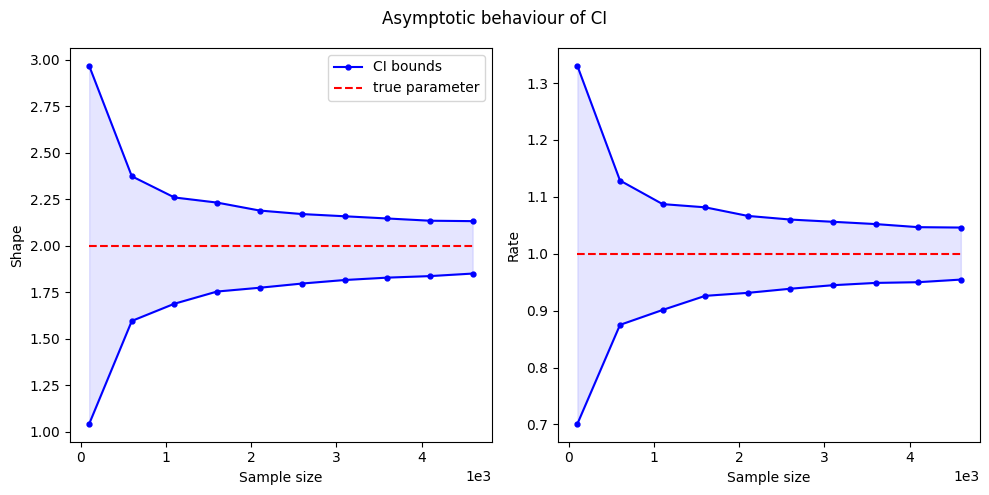

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(10,5))



ax[0].plot(ticks,[alphas_CI[i][0] for i in range(len(ticks))],color='blue',marker='.',markersize=7)
#ax[0].plot(ticks,[alphas_CI_boot[i][0] for i in range(len(ticks))],color='gray',marker='.',markersize=7)

ax[0].plot(ticks,[alphas_CI[i][1] for i in range(len(ticks))],color='blue',marker='.',markersize=7,label='CI bounds')
#ax[0].plot(ticks,[alphas_CI_boot[i][1] for i in range(len(ticks))],color='gray',marker='.',markersize=7,label='Bootstrapped bounds')
ax[0].fill_between(ticks,[alphas_CI[i][0] for i in range(len(ticks))],[alphas_CI[i][1] for i in range(len(ticks))],color='blue',alpha=0.1)
ax[0].plot(ticks,alpha*np.ones(len(ticks)),color='red',ls='--',label='true parameter')
ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[0].set_ylabel('Shape')
ax[0].set_xlabel('Sample size')


ax[1].plot(ticks,[betas_CI[i][0] for i in range(len(ticks))],color='blue',marker='.',markersize=7)
ax[1].plot(ticks,[betas_CI[i][1] for i in range(len(ticks))],color='blue',marker='.',markersize=7)
#ax[1].plot(ticks,[betas_CI_boot[i][0] for i in range(len(ticks))],color='gray',marker='.',markersize=7)
#ax[1].plot(ticks,[betas_CI_boot[i][1] for i in range(len(ticks))],color='gray',marker='.',markersize=7)

ax[1].fill_between(ticks,[betas_CI[i][0] for i in range(len(ticks))],[betas_CI[i][1] for i in range(len(ticks))],color='blue',alpha=0.1)
ax[1].plot(ticks,beta*np.ones(len(ticks)),color='red',ls='--',label='True parameter')
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[0].legend()
ax[1].set_ylabel('Rate')

ax[1].set_xlabel('Sample size')
fig.suptitle('Asymptotic behaviour of CI')
fig.tight_layout()